In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/injury-prediction-for-competitive-runners/day_approach_maskedID_timeseries.csv
/kaggle/input/injury-prediction-for-competitive-runners/week_approach_maskedID_timeseries.csv


                                                     Introduction
Running is one of the most popular sports in the world. [60 million](http://https://www.statista.com/topics/1743/running-and-jogging/#topicHeader__wrapper) people participated in jogging, running, or trail running in America alone in 2017. But it is reported that [50%](https://www.yalemedicine.org/conditions/running-injury#:~:text=In%20fact%2C%20at%20least%2050,People%20who%20run%2C%20love%20it.) of runners get injured every year. Dealing with injuries can be a hard and long process, which is why runners take many precautions to mitigate the chance of injuries. These precautions include investments in rollers, massages, and professional coaching to name a few. But these resources take investments that many people can not afford. With the advances in data science, many people are wondering wether machine learning will be able to reduce the barrier for injury prediction resources. In our analysis we will see how popular machine learning algorithms deal with predciting injuries using running data 

In [2]:
df = pd.read_csv("/kaggle/input/injury-prediction-for-competitive-runners/week_approach_maskedID_timeseries.csv")
np.random.seed(0)

In order to fully understand the Dataset, I read the researchers Read_Me text file. I will post the URL here in case anyone wants to understand 
https://dataverse.nl/dataset.xhtml?persistentId=doi:10.34894/UWU9PV


We will do some basic data exploration to understand if the data set is dirty.

In [3]:
missing_Values = df.isnull().sum()
missing_Values 

nr. sessions               0
nr. rest days              0
total kms                  0
max km one day             0
total km Z3-Z4-Z5-T1-T2    0
                          ..
injury                     0
rel total kms week 0_1     0
rel total kms week 0_2     0
rel total kms week 1_2     0
Date                       0
Length: 72, dtype: int64

In [4]:
df.describe()

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
count,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,...,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,42798.000000,4.279800e+04,4.279800e+04,4.279800e+04,42798.000000
mean,5.809337,1.874667,49.543911,14.009255,9.433621,0.930184,1.672531,4.859398,3.456888,4.063970,...,0.525709,0.255089,0.184927,0.343522,34.538249,0.013435,4.408628e+05,9.014685e+05,4.803623e+05,1227.733422
std,2.484234,1.853287,36.715017,9.071678,8.887120,1.040631,1.263528,6.984670,4.577423,5.645305,...,0.390604,0.153214,0.127996,0.219536,19.020826,0.115130,4.328234e+06,6.945503e+06,4.656806e+06,806.495152
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,5.000000,1.000000,22.800000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.150000,0.110000,0.170000,20.000000,0.000000,6.955245e-01,6.723968e-01,6.923077e-01,437.000000
50%,6.000000,1.000000,44.800000,13.400000,8.000000,1.000000,2.000000,0.000000,0.000000,1.500000,...,0.730000,0.220000,0.160000,0.310000,34.000000,0.000000,9.891862e-01,1.001431e+00,9.897523e-01,1254.000000
75%,7.000000,3.000000,70.100000,18.300000,14.600000,2.000000,3.000000,8.000000,6.300000,6.300000,...,0.840000,0.360000,0.240000,0.520000,50.000000,0.000000,1.320515e+00,1.422171e+00,1.327586e+00,1913.000000
max,14.000000,7.000000,242.000000,131.000000,100.000000,6.000000,7.000000,79.800000,75.000000,80.000000,...,1.000000,0.900000,0.900000,1.000000,73.000000,1.000000,2.096000e+08,2.176000e+08,2.096000e+08,2673.000000


In [5]:
df.head(10)

,nr. sessions,nr. rest days,total kms,max km one day,total km Z3-Z4-Z5-T1-T2,"nr. tough sessions (effort in Z5, T1 or T2)",nr. days with interval session,total km Z3-4,max km Z3-4 one day,total km Z5-T1-T2,...,max training success.2,avg recovery.2,min recovery.2,max recovery.2,Athlete ID,injury,rel total kms week 0_1,rel total kms week 0_2,rel total kms week 1_2,Date
0,5.0,2.0,22.2,16.4,11.8,1.0,2.0,10.0,10.0,0.6,...,0.0,0.18,0.16,0.20,0,0,0.718447,1.378882,1.919255,0
1,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.20,0,0,0.683544,1.018868,1.490566,1
2,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,0.683544,1.018868,1.490566,2
3,5.0,2.0,21.6,16.4,11.7,1.0,2.0,10.0,10.0,0.5,...,0.0,0.18,0.16,0.18,0,0,0.683544,1.018868,1.490566,3
4,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,4
5,6.0,1.0,39.2,17.6,18.9,1.0,3.0,17.2,10.0,0.5,...,0.0,0.17,0.16,0.18,0,0,2.202247,1.361111,0.618056,5
6,6.0,1.0,33.3,17.6,15.4,1.0,3.0,13.7,7.2,0.5,...,0.0,0.17,0.16,0.18,0,0,1.500000,1.077670,0.718447,6
7,5.0,2.0,33.3,17.6,15.4,1.0,3.0,13.7,7.2,0.5,...,0.0,0.17,0.16,0.18,0,0,1.500000,1.077670,0.718447,7
8,5.0,2.0,32.9,17.6,15.5,0.0,3.0,14.3,7.2,0.0,...,0.0,0.17,0.16,0.18,0,0,1.523148,1.041139,0.683544,8
9,5.0,2.0,32.9,17.6,15.5,0.0,3.0,14.3,7.2,0.0,...,0.0,0.17,0.16,0.18,0,0,1.523148,1.041139,0.683544,9


 The data is too high dimension for us to start data analysis. We will start off by dropping attributes based on empirical analysis. Any attributes based on how the person feels was removed from the data set. We wanted to do see if we could predict data strictly based on the quality of running using quantative data. Although 'recovery' attributes could be useful, its very hard to accurately understand how a runners body is feeling based off of survey questions.

In [6]:
df.info()
df = df.drop(['avg training success', 'min training success', 'max training success', 'avg training success.1', 'max training success.1', 'min training success.1'], axis = 1)
df = df.drop(['avg training success.2', 'max training success.2', 'min training success.2', 'avg exertion', 'min exertion', 'max exertion'], axis = 1)
df = df.drop(['avg exertion.1', 'min exertion.1', 'max exertion.1', 'avg exertion.2', 'min exertion.2', 'max exertion.2', 'max km one day'], axis = 1)
df = df.drop(['avg recovery', 'min recovery', 'max recovery', 'avg recovery.1', 'min recovery.1', 'max recovery.1', 'avg recovery.2', 'min recovery.2', 'max recovery.2'], axis = 1)
df = df.drop(['rel total kms week 0_1', 'rel total kms week 0_2', 'rel total kms week 1_2'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42798 entries, 0 to 42797
Data columns (total 72 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   nr. sessions                                   42798 non-null  float64
 1   nr. rest days                                  42798 non-null  float64
 2   total kms                                      42798 non-null  float64
 3   max km one day                                 42798 non-null  float64
 4   total km Z3-Z4-Z5-T1-T2                        42798 non-null  float64
 5   nr. tough sessions (effort in Z5, T1 or T2)    42798 non-null  float64
 6   nr. days with interval session                 42798 non-null  float64
 7   total km Z3-4                                  42798 non-null  float64
 8   max km Z3-4 one day                            42798 non-null  float64
 9   total km Z5-T1-T2                              427

We have succesfully reduced the attributes of the data set from 71 to 40. This is a good start but the data set is still to high dimensional.

In [7]:
df['Athlete ID'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73])

In total there are 74 athletes. Let's isolate the first athlete and see what their training looks like.


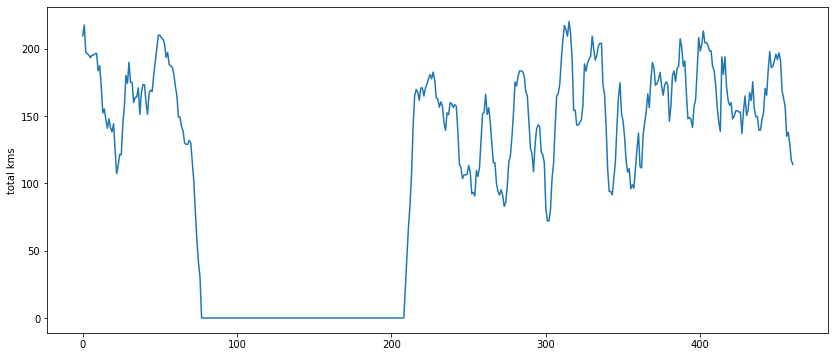

In [8]:
def indexIndividualData(id):
  df0 = df[df['Athlete ID'] == id]
  index1 = df0.index[0]
  indexLast = df0.index[-1]
  y = indexLast - len(df0[df0['injury']==0]) - len(df0[df0['injury']==1])
  df0 = df0.rename(index = lambda x: x - y - 1 if x > indexLast - len(df0[df0['injury']==1]) else x - index1)
  df0 = df0.sort_values(by = 'Date')
  return df0
def plotIndividualData(id, column):
  df0 = indexIndividualData(id)
  plt.figure(figsize = (14,6))
  sns.lineplot(data=df0[column])

plotIndividualData(1, "total kms")

This graph does lead us to some questions. Why is there a drop in training for such a long period for this athlete? Assuming each data point is a week, over one hundred weeks of being injured does not make sense. It could make more sense if the points are actually days, but one hundred days injured is also a lot. 

Another part of that data set which is cofusing are the '.1','.2','.3' attributes. We do not understand what exactly they mean in the context of the dates attribute, even after reading the "README" file. 

total kms      110.078308
total kms.1    109.772017
total kms.2    106.549675
dtype: float64
nr. sessions      6.017354
nr. sessions.1    6.010846
nr. sessions.2    5.865510
dtype: float64
total kms      71.518745
total kms.1    71.278621
total kms.2    70.798683
dtype: float64
nr. sessions      5.557707
nr. sessions.1    5.557707
nr. sessions.2    5.525174
dtype: float64


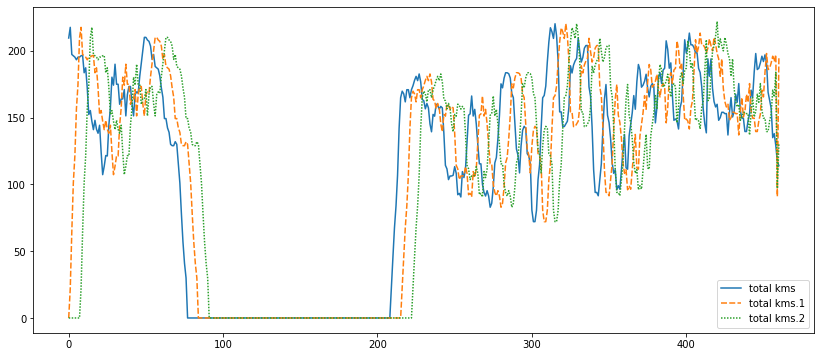

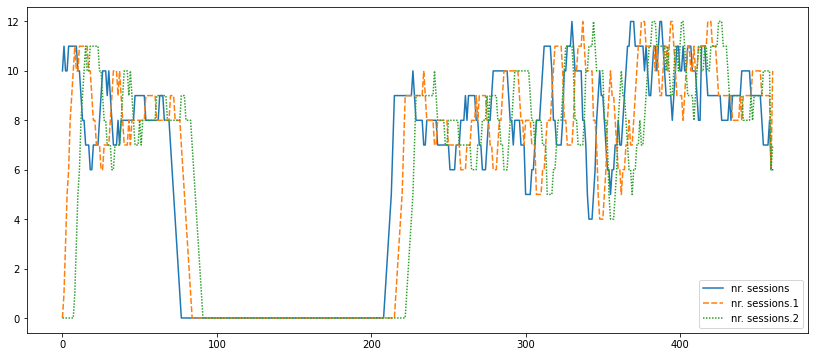

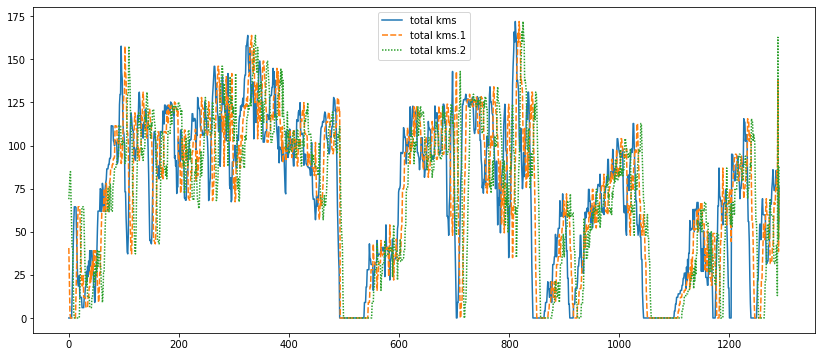

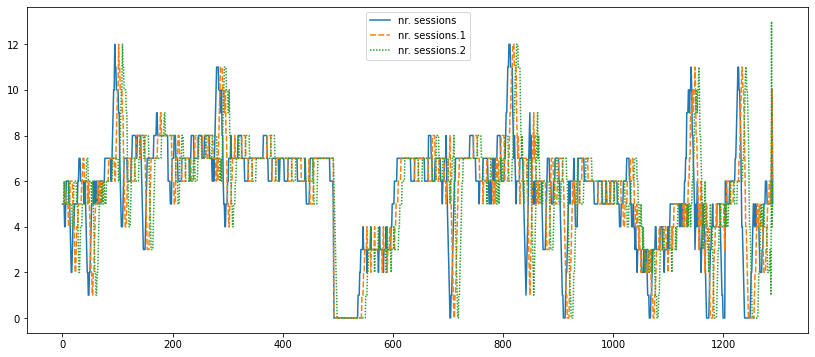

In [9]:
def dateInjurySubset(id, column1, column2, column3): 
  df0 = indexIndividualData(id)
  return df0[[column1,column2,column3]]



def plotIndividualDataDuoColumn(id, column1, column2, column3):
  df0 = dateInjurySubset(id,column1,column2,column3)
  plt.figure(figsize = (14,6))
  sns.lineplot(data=df0) 

print(dateInjurySubset(1,"total kms", "total kms.1","total kms.2").mean())
plotIndividualDataDuoColumn(1,"total kms", "total kms.1", "total kms.2")
print(dateInjurySubset(1,"nr. sessions", "nr. sessions.1","nr. sessions.2").mean())
plotIndividualDataDuoColumn(1,"nr. sessions", "nr. sessions.1","nr. sessions.2")
print(dateInjurySubset(2,"total kms", "total kms.1","total kms.2").mean())
plotIndividualDataDuoColumn(2,"total kms", "total kms.1", "total kms.2")
print(dateInjurySubset(2,"nr. sessions", "nr. sessions.1","nr. sessions.2").mean())
plotIndividualDataDuoColumn(2,"nr. sessions", "nr. sessions.1","nr. sessions.2") 

Since there does not seem to be any difference between the attributes and their ".1",".2" siblings, the attributes seem to be just noise. It could be justification to drop all the suffix attributes, as we are not sure what they contribute to the data

In [10]:
dfQ2 = df[['Athlete ID', 'total km Z3-Z4-Z5-T1-T2', 'total km Z3-Z4-Z5-T1-T2.1', 'total km Z3-Z4-Z5-T1-T2.2', 'injury', 'nr. tough sessions (effort in Z5, T1 or T2)', 'nr. tough sessions (effort in Z5, T1 or T2).1', 'nr. tough sessions (effort in Z5, T1 or T2).2', 'total km Z5-T1-T2', 'total km Z5-T1-T2.1', 'total km Z5-T1-T2.2', 'total km Z3-4', 'total km Z3-4.1', 'total km Z3-4.2']]
dfArray = []
for i in df['Athlete ID'].unique():
  dfArray.append(indexIndividualData(i))

The 'dates' attribute is also confusing in this data set. We will try and visualize it to get a better idea of what it means. 

In [11]:
df0 = dfArray[1]
injury = df0[df0['injury'] == 1]
notInjured = df0[df0['injury'] == 0]
print("INJURED DATES ID 1")
for i in injury['Date']:
  print(i)
print("NOT INJURED DATES ID 1:\n")
for i in notInjured['Date']:
  print(i)

INJURED DATES ID 1
672
765
NOT INJURED DATES ID 1:

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
26

Why the 'dates' attribute jumps from 400 to 700 for an athlete does not make sense to us. In order to accurately predict date there should be consecutive date that can be analyzed. We could be missing something but we cant attemt to try and classify the running data anyways. The data exploration also showed us that the data set is extremely biased towards the non-injured data.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


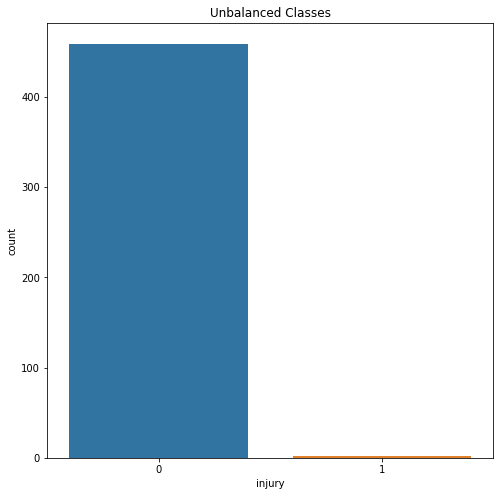

In [12]:
plt.figure(figsize=(8, 8))
sns.countplot('injury', data=df0)
plt.title('Unbalanced Classes')
plt.show()

Here we can see just how biased the data set is for non-injured cases.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


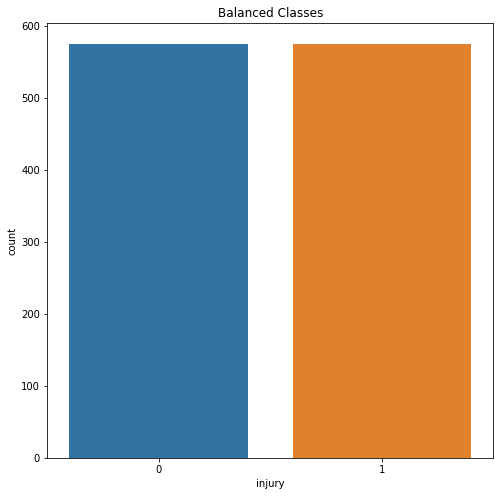

In [13]:
df1 = df0.sort_values(by = 'Athlete ID');

shuffled_df1 = df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
injury_df1 = shuffled_df1.loc[shuffled_df1['injury'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_injured_df1 = shuffled_df1.loc[shuffled_df1['injury'] == 0].sample(n=575)

# Concatenate both dataframes again
normalized_df = pd.concat([injury_df1, non_injured_df1])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('injury', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

Here we balance out the data set using sampling. This should allow us to avoid overffiting in our predictive models. 

Below we will start of by showing what happens when the data set is skewed. You will see that the accruacy is very high for the unbalanced data set because the classifier will identify all the data points as non-injured. This would be uselss for the goal of this project. 

In [14]:
y = df0['injury']
X = df0.drop('injury', axis=1)
X = df0.drop('Athlete ID', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.3, random_state = 0)

K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.9968944099378882, 0.9928057553956835]
3 : [0.9968944099378882, 0.9928057553956835]
4 : [0.9968944099378882, 0.9928057553956835]
5 : [0.9968944099378882, 0.9928057553956835]
6 : [0.9968944099378882, 0.9928057553956835]
7 : [0.9968944099378882, 0.9928057553956835]
8 : [0.9968944099378882, 0.9928057553956835]
9 : [0.9968944099378882, 0.9928057553956835]
10 : [0.9968944099378882, 0.9928057553956835]
11 : [0.9968944099378882, 0.9928057553956835]
12 : [0.9968944099378882, 0.9928057553956835]
13 : [0.9968944099378882, 0.9928057553956835]
14 : [0.9968944099378882, 0.9928057553956835]
15 : [0.9968944099378882, 0.9928057553956835]
16 : [0.9968944099378882, 0.9928057553956835]
17 : [0.9968944099378882, 0.9928057553956835]
18 : [0.9968944099378882, 0.9928057553956835]
19 : [0.9968944099378882, 0.9928057553956835]
20 : [0.9968944099378882, 0.9928057553956835]


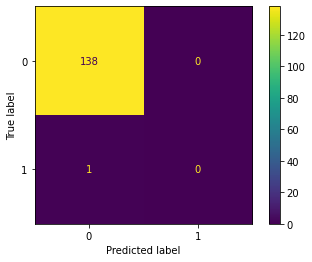

In [15]:
from sklearn.metrics import classification_report, plot_confusion_matrix 
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test)

The confusion matrix above shows that all data points are identified as non-injured. We will try and use the balanced data set next. 

In [16]:
y = normalized_df['injury']
X = normalized_df.drop('injury', axis=1)
X = normalized_df.drop('Athlete ID', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.3, random_state = 0)

K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
    
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.7987577639751553, 0.5797101449275363]
3 : [0.7937888198757764, 0.5855072463768116]
4 : [0.7515527950310559, 0.5855072463768116]
5 : [0.7552795031055901, 0.5826086956521739]
6 : [0.7453416149068323, 0.5565217391304348]
7 : [0.7192546583850932, 0.5652173913043478]
8 : [0.7105590062111802, 0.5681159420289855]
9 : [0.6993788819875777, 0.5710144927536231]
10 : [0.7080745341614907, 0.591304347826087]
11 : [0.684472049689441, 0.6028985507246377]
12 : [0.6906832298136646, 0.5942028985507246]
13 : [0.6708074534161491, 0.591304347826087]
14 : [0.6745341614906832, 0.5855072463768116]
15 : [0.653416149068323, 0.6028985507246377]
16 : [0.6459627329192547, 0.5797101449275363]
17 : [0.6447204968944099, 0.6057971014492753]
18 : [0.6484472049689441, 0.6173913043478261]
19 : [0.6546583850931676, 0.6057971014492753]
20 : [0.6571428571428571, 0.6057971014492753]


Here we can see that as we increase the paramater k, the training accuracy goes down significantly (from about 80% to 65%) and the testing accuracy increases slighlty (from about 58% to 60%). We will use the confusion matrix to see how well the predictive model is handling the non-injured data compared to the injured data. 

In [17]:
 clf = KNeighborsClassifier(n_neighbors = 2)
 clf.fit(X_train, y_train)
  
 training_score = clf.score(X_train, y_train)
 test_score = clf.score(X_test, y_test)
 K.append(k)
  
 training.append(training_score)
 test.append(test_score)
 scores[k] = [training_score, test_score]

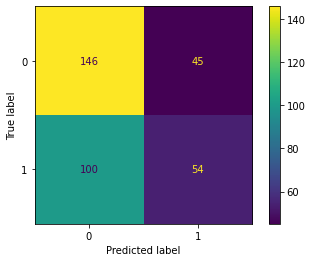

In [18]:
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test)

At the k value of 2, the classifier seems to be more accurate at predicintg the non-injured data. 

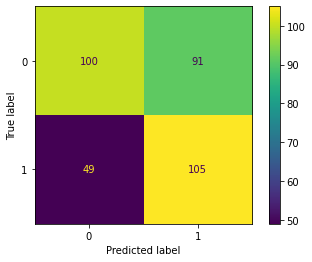

In [19]:
 clf = KNeighborsClassifier(n_neighbors = 12)
 clf.fit(X_train, y_train)
  
 training_score = clf.score(X_train, y_train)
 test_score = clf.score(X_test, y_test)
 K.append(k)
  
 training.append(training_score)
 test.append(test_score)
 scores[k] = [training_score, test_score]

clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test)

With a high k value of 21, you get more acurate injury prediction, but that also means a lot more false positives for non-injure data, meaning the classifier identifies those people who are not injured as injured at a much higher rate.  

The equilibrium that we found was a k parameter value of 12, with an overall accuracy rate of 60%, 52% for non-injured data points and 68% accuracy for predicting injured data points. This is decent considering how biased the data set is but there are other binary classifiers and other balancing method that we will test to see if we can get better accuracy. 

In [20]:
#SVM classifier using undersampling
from imblearn.under_sampling import RandomUnderSampler
X = df.drop('injury', axis = 1)
Y = df['injury']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)
rus = RandomUnderSampler(random_state=0)
X_train, Y_train =rus.fit_resample(X_train,Y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

[[6253 4303]
 [  58   86]]


This code involves using a support vector machine classifier to predict whether a data point is injured or not using the undersampling technique to counter our imbalanced data set.

In [21]:
#SVM Classifier using oversampling
from imblearn.over_sampling import SMOTE
X = df.drop('injury', axis = 1)
Y = df['injury']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)
sm = SMOTE(random_state = 0)
X_train, Y_train = sm.fit_resample(X_train,Y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

[[10011   545]
 [  122    22]]


This code involves using a support vector machine classifier to predict whether a data point is injured or not using the oversampling technique to counter our imbalanced data set.

In [22]:
#Bagging Classifier With Undersampling
import sklearn.ensemble
X = df.drop('injury', axis = 1)
Y = df['injury']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)
rus = RandomUnderSampler(random_state=0)
X_train, Y_train =rus.fit_resample(X_train,Y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
bag = sklearn.ensemble.BaggingClassifier(n_estimators = 35)
bag.fit(X_train, Y_train)
Y_pred = bag.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

[[6099 4457]
 [  51   93]]


This code involves using a bagging classifier to predict whether a data point is injured or not using the undersampling technique to counter our imbalanced data set.

In [23]:
#Bagging Classifier With Oversampling
import sklearn.ensemble
X = df.drop('injury', axis = 1)
Y = df['injury']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)
sm = SMOTE(random_state = 0)
X_train, Y_train = sm.fit_resample(X_train,Y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
bag = sklearn.ensemble.BaggingClassifier(n_estimators = 30)
bag.fit(X_train, Y_train)
Y_pred = bag.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

[[10556     0]
 [  144     0]]


This code involves using a bagging classifier to predict whether a data point is injured or not using the oversampling technique to counter our imbalanced data set.

In [24]:
#XGBooster model with Undersampling
from xgboost import XGBClassifier
X = df.drop('injury', axis = 1)
Y = df['injury']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)
rus = RandomUnderSampler(random_state=0)
X_train, Y_train =rus.fit_resample(X_train,Y_train)
boost = XGBClassifier(max_depth = 3, n_estimators = 30)
boost.fit(X_train, Y_train)
Y_pred = boost.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

[19:40:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[6009 4547]
 [  52   92]]


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


This code involves using the XGBooster classifier to predict whether a data point is injured or not using the undersampling technique to counter our imbalanced data set.

In [25]:
#XGBooster model with Oversampling
from xgboost import XGBClassifier
X = df.drop('injury', axis = 1)
Y = df['injury']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, stratify = Y)
sm = SMOTE(random_state = 0)
X_train, Y_train = sm.fit_resample(X_train,Y_train)
boost = XGBClassifier(max_depth = 2, n_estimators = 30)
boost.fit(X_train, Y_train)
Y_pred = boost.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:40:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[10555     1]
 [  144     0]]


This code involves using a bagging classifier to predict whether a data point is injured or not using the oversampling technique to counter our imbalanced data set.

Overall, the results of the models showed that the model accuracy was more dependent on whether oversampling or undersampling was used. The oversampling method was more successful at classifying data points that were actually non-injured, while the undersampling method did a much better job at accurately classifying the points that were actually injured.

                                                    Conclusion
We balanced the data set using multiple different strategies, such as sampling, oversampling, and undersampling. The different balanced datasets where tested on several different binary classifiers, such as KNN, SVM, Bagging, and XGBooster. The highest accruacy we achieved is with XGBooster and Bagging with a 99% accuracy rate. The downside for this accuracy is overfitting as the minority class has a 0% predicted accuracy. The classifier which has the best accuracy equilibrium in proportion to the minority and majority class is XGBooster with Undersampling. This had a 60% overall accuracy rate, with 60% for injured prediction and 60% for non-injured prediction. Neither of these predicted accuracies are useful. The high accuracy overfits, and the lower accuracy is not good enough for real life application. Since we are both novices we do not know how to deal with overtly biased data sets. If others might have tips for how to deal with bias or if someone has other tips we would be happy 